In [1]:
import json
import os
import pandas as pd
import numpy as np
from loguru import logger
from utils.tool import *

In [2]:
edges_file = 'E:\\学习\\数模相关\\code_of_argorithm\\深圳杯C题\\edges_info.json' 
nodes_file = 'E:\\学习\\数模相关\\code_of_argorithm\\深圳杯C题\\nodes_info.json'

In [3]:
#打开文件
with open(edges_file, 'r', encoding='utf-8') as f:
    edges_info = json.load(f)
#因为json文件中存储的边是字符串格式的元组，所以需要将其转换为实际的元组
edges_info = [{tuple(eval(edge)): info for edge, info in edge_dict.items()} for edge_dict in edges_info]

with open(nodes_file, 'r', encoding='utf-8') as f:
    nodes_info = json.load(f)

In [4]:
graph = UndirectedGraph(nodes_info, edges_info)

In [5]:
def rprint(info:str,result) -> None:
    """
    打印结果
    :param info: 信息
    :param result: 结果
    :return: None
    """
    logger.info(info)
    print(result)

In [34]:
rprint("带有分布式发电的节点:", graph.find_nodes_by_attribute("type", "政府和机构"))

2025-05-15 22:57:50.882 | INFO     | __main__:rprint:8 - 带有分布式发电的节点:


['9', '21', '29', '36', '45', '58', '61']


In [ ]:
rprint("查找具有特定属性的边",graph.find_edges_by_attribute("type", "馈线间联络线"))

2025-05-15 22:56:50.299 | INFO     | __main__:rprint:8 - 查找具有特定属性的边


[]


In [36]:
rprint("查找两个节点之间的路径", graph.find_path(49, 48))

2025-05-15 23:11:28.725 | INFO     | __main__:rprint:8 - 查找两个节点之间的路径


[49, 44, 45, 46, 47, 48]


In [9]:
rprint("获取所有节点的度数", graph.get_all_degrees())

2025-05-15 22:55:02.117 | INFO     | __main__:rprint:8 - 获取所有节点的度数


{'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 0, '12': 0, '13': 0, '14': 0, '15': 0, '16': 0, '17': 0, '18': 0, '19': 0, '20': 0, '21': 0, '22': 0, '23': 0, '24': 0, '25': 0, '26': 0, '27': 0, '28': 0, '29': 0, '30': 0, '31': 0, '32': 0, '33': 0, '34': 0, '35': 0, '36': 0, '37': 0, '38': 0, '39': 0, '40': 0, '41': 0, '42': 0, '43': 0, '44': 0, '45': 0, '46': 0, '47': 0, '48': 0, '49': 0, '50': 0, '51': 0, '52': 0, '53': 0, '54': 0, '55': 0, '56': 0, '57': 0, '58': 0, '59': 0, '60': 0, '61': 0, '62': 0, 1: 2, 2: 2, 3: 3, 4: 3, 5: 3, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 20: 2, 21: 2, 22: 1, 17: 3, 18: 2, 19: 2, 14: 2, 15: 2, 16: 1, 23: 2, 24: 4, 25: 3, 26: 3, 27: 2, 28: 2, 29: 2, 30: 2, 31: 2, 32: 1, 33: 2, 34: 2, 35: 1, 40: 2, 41: 2, 42: 1, 36: 2, 37: 2, 38: 2, 39: 1, 43: 3, 44: 3, 45: 3, 46: 2, 47: 2, 48: 1, 49: 2, 50: 2, 51: 2, 52: 1, 53: 2, 54: 2, 55: 1, 56: 2, 57: 3, 58: 2, 59: 1, 60: 2, 61: 2, 62: 2}


In [10]:
rprint("找出两个节点之间的所有路径", graph.get_all_paths(1, 5))

2025-05-15 22:55:02.132 | INFO     | __main__:rprint:8 - 找出两个节点之间的所有路径


[[1, 2, 3, 4, 5], [1, 17, 4, 5]]


In [11]:
rprint("获取属性的统计摘要", graph.get_attribute_summary("DG"))

2025-05-15 22:55:02.316 | INFO     | __main__:rprint:8 - 获取属性的统计摘要


   attribute  count      mean       std  min      25%  median      75%     max
0     length     63  0.738571  0.914265  0.0  0.15000  0.3500  1.07000  4.2500
1  Reactance     63  0.062886  0.077822  0.0  0.01275  0.0298  0.09130  0.3619
2   Resistor     63  0.099037  0.120199  0.0  0.01875  0.0438  0.17815  0.5075


In [12]:
rprint("计算图的平均度数", graph.get_average_degree())

2025-05-15 22:55:02.807 | INFO     | __main__:rprint:8 - 计算图的平均度数


1.0161290322580645


In [13]:
rprint("查找两个节点之间的边", graph.get_edge(1, 2))

2025-05-15 22:55:02.826 | INFO     | __main__:rprint:8 - 查找两个节点之间的边


{'length': 0.025, 'type': '普通线', '分段开关': 'None', '联络开关': 'None', 'Resistor': 0.0031, 'Reactance': 0.0021}


In [14]:
rprint("获取边属性", graph.get_edge_attribute(1, 2))

2025-05-15 22:55:04.276 | INFO     | __main__:rprint:8 - 获取边属性


{'length': 0.025, 'type': '普通线', '分段开关': 'None', '联络开关': 'None', 'Resistor': 0.0031, 'Reactance': 0.0021}


In [15]:
rprint("统计边特定属性的分布情况", graph.get_edge_attribute_statistics("type"))

2025-05-15 22:55:04.325 | INFO     | __main__:rprint:8 - 统计边特定属性的分布情况


Counter({'普通线': 60, '馈线间联络线': 3})


In [16]:
rprint("获取节点属性", graph.get_node_attribute(5))

2025-05-15 22:55:04.360 | INFO     | __main__:rprint:8 - 获取节点属性


节点 5 不存在
None


In [17]:
rprint("获取节点特定属性的分布情况", graph.get_node_attribute_statistics("DG"))

2025-05-15 22:55:04.388 | INFO     | __main__:rprint:8 - 获取节点特定属性的分布情况


Counter({False: 54, True: 8})


In [18]:
rprint("获取节点的度", graph.get_node_degree(1))

2025-05-15 22:55:04.406 | INFO     | __main__:rprint:8 - 获取节点的度


2


In [19]:
rprint("检查两个节点之间是否有边", graph.has_edge(1, 2))

2025-05-15 22:55:04.421 | INFO     | __main__:rprint:8 - 检查两个节点之间是否有边


True


In [20]:
rprint("检查两个节点之间是否连通，并返回路径", graph.is_connected(1, 2))

2025-05-15 22:55:04.434 | INFO     | __main__:rprint:8 - 检查两个节点之间是否连通，并返回路径


节点 1 和节点 2 连通
路径: 1 -> 2
True


In [21]:
graph.plot_shortest_paths(5, [2,62,4])

起始节点 5 不存在


In [22]:
graph.print_metrics_report()

               图分析报告

--- 基本信息 ---
节点数: 124
边数: 63
图密度: 0.0083

--- 度分布 ---
平均度: 1.02
最大度: 4
最小度: 0
度标准差: 1.11

--- 连通性和路径 ---
连通分量数: 63
直径 (最大连通分量): 19
平均最短路径长度 (最大连通分量): 9.1311

--- 聚类 ---
平均聚类系数: 0.0000

注: 部分指标可能因图结构而无法计算或只针对最大连通分量计算


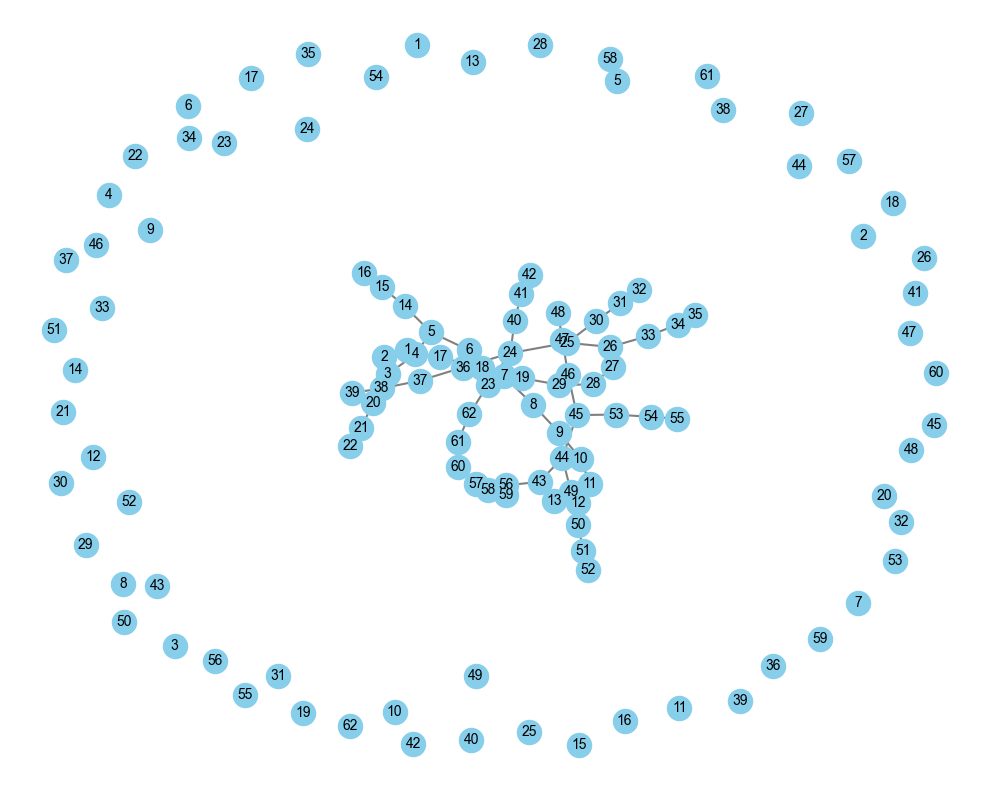

In [23]:
graph.visualize()

e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:928: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:928: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:928: UserWarning: Glyph 33410 (\N{CJK UNIFIED IDEOGRAPH-8282}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:928: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:928: UserWarning: Glyph 23646 (\N{CJK UNIFIED IDEOGRAPH-5C5E}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:928: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题

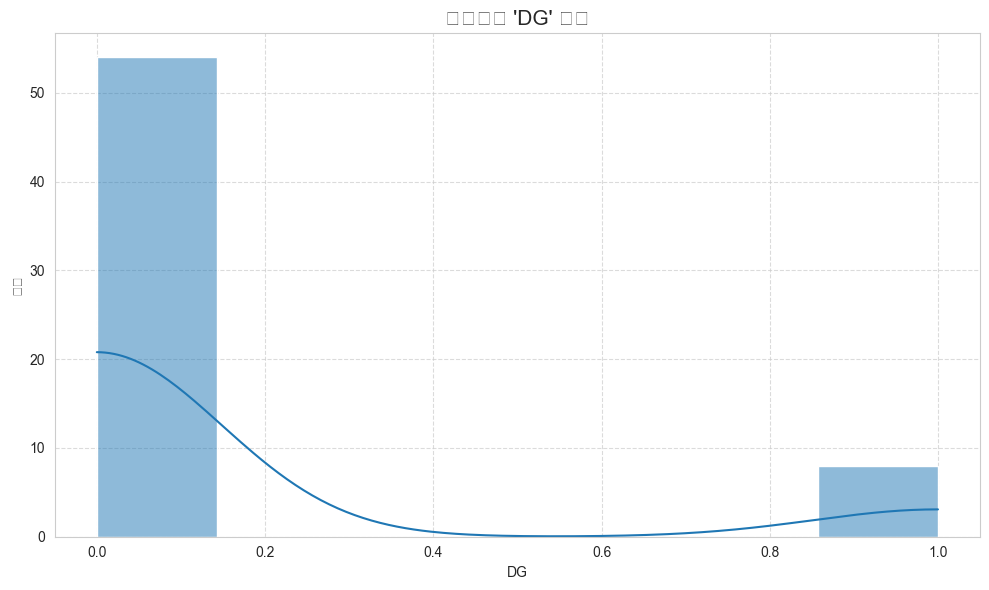

In [24]:
graph.visualize_attribute_distribution("DG")


e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:1049: UserWarning: Glyph 31038 (\N{CJK UNIFIED IDEOGRAPH-793E}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:1049: UserWarning: Glyph 21306 (\N{CJK UNIFIED IDEOGRAPH-533A}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:1049: UserWarning: Glyph 26816 (\N{CJK UNIFIED IDEOGRAPH-68C0}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:1049: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:1049: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:1049: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm

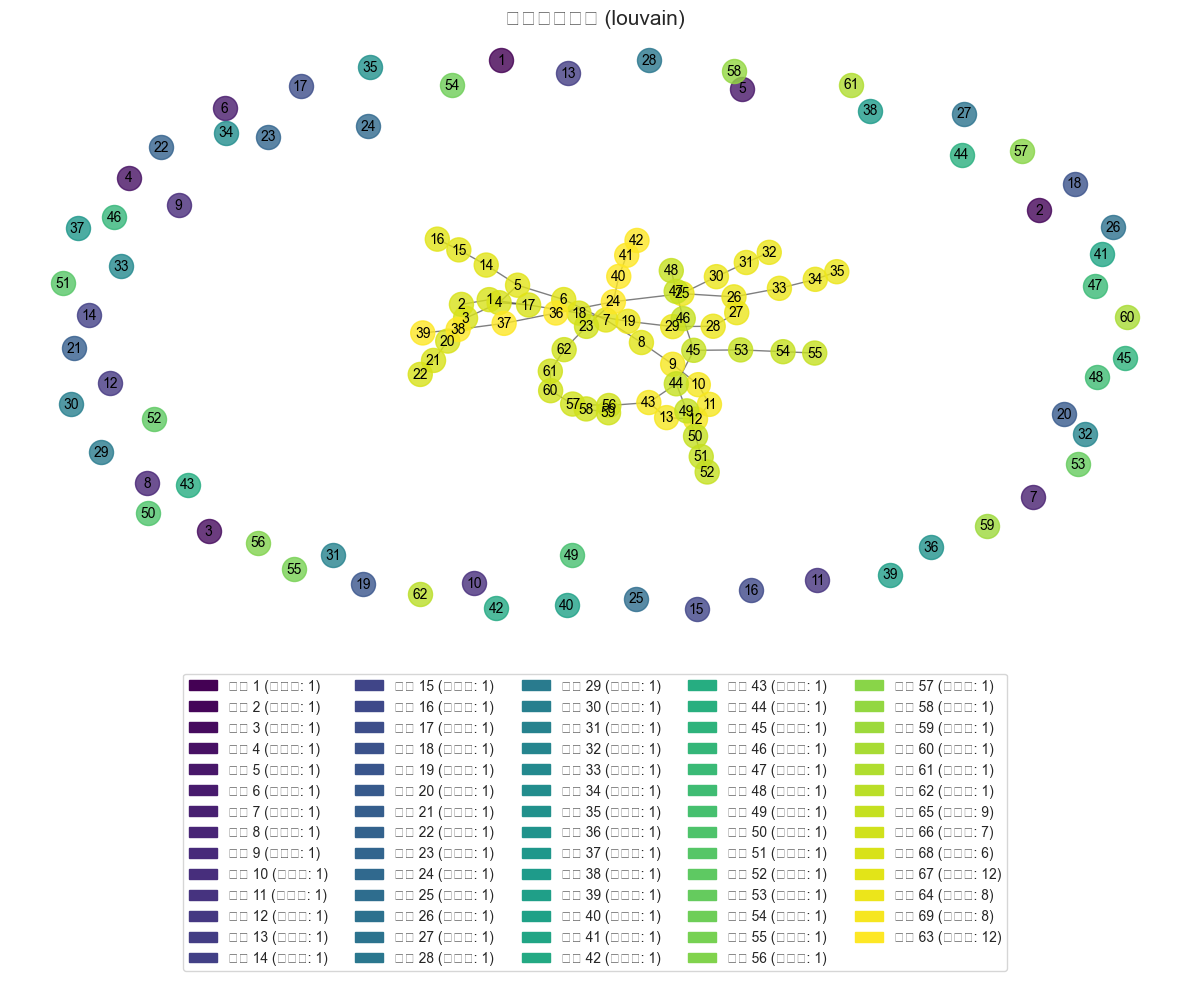

共检测到 69 个社区:
社区 1: 1 个节点
社区 2: 1 个节点
社区 3: 1 个节点
社区 4: 1 个节点
社区 5: 1 个节点
社区 6: 1 个节点
社区 7: 1 个节点
社区 8: 1 个节点
社区 9: 1 个节点
社区 10: 1 个节点
社区 11: 1 个节点
社区 12: 1 个节点
社区 13: 1 个节点
社区 14: 1 个节点
社区 15: 1 个节点
社区 16: 1 个节点
社区 17: 1 个节点
社区 18: 1 个节点
社区 19: 1 个节点
社区 20: 1 个节点
社区 21: 1 个节点
社区 22: 1 个节点
社区 23: 1 个节点
社区 24: 1 个节点
社区 25: 1 个节点
社区 26: 1 个节点
社区 27: 1 个节点
社区 28: 1 个节点
社区 29: 1 个节点
社区 30: 1 个节点
社区 31: 1 个节点
社区 32: 1 个节点
社区 33: 1 个节点
社区 34: 1 个节点
社区 35: 1 个节点
社区 36: 1 个节点
社区 37: 1 个节点
社区 38: 1 个节点
社区 39: 1 个节点
社区 40: 1 个节点
社区 41: 1 个节点
社区 42: 1 个节点
社区 43: 1 个节点
社区 44: 1 个节点
社区 45: 1 个节点
社区 46: 1 个节点
社区 47: 1 个节点
社区 48: 1 个节点
社区 49: 1 个节点
社区 50: 1 个节点
社区 51: 1 个节点
社区 52: 1 个节点
社区 53: 1 个节点
社区 54: 1 个节点
社区 55: 1 个节点
社区 56: 1 个节点
社区 57: 1 个节点
社区 58: 1 个节点
社区 59: 1 个节点
社区 60: 1 个节点
社区 61: 1 个节点
社区 62: 1 个节点
社区 65: 9 个节点
社区 66: 7 个节点
社区 68: 6 个节点
社区 67: 12 个节点
社区 64: 8 个节点
社区 69: 8 个节点
社区 63: 12 个节点


In [25]:
graph.visualize_communities('louvain')

e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:862: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:862: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:862: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:862: UserWarning: Glyph 33410 (\N{CJK UNIFIED IDEOGRAPH-8282}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:862: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:862: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题

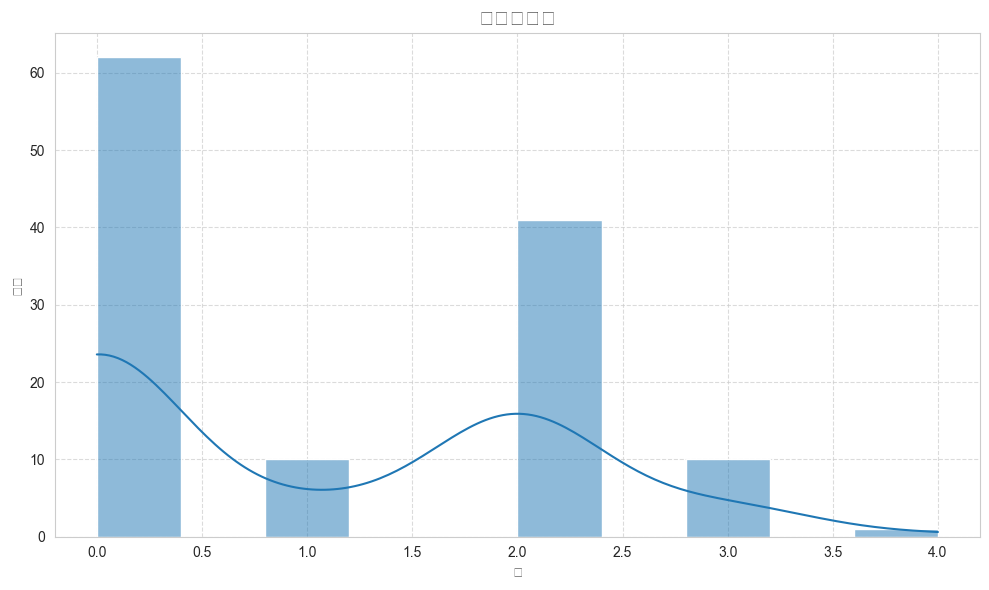

平均度: 1.02
中位数度: 0.50
最大度: 4
最小度: 0
度标准差: 1.11


In [26]:
graph.visualize_degree_distribution()

e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:862: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:862: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:862: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:862: UserWarning: Glyph 33410 (\N{CJK UNIFIED IDEOGRAPH-8282}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:862: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:862: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题

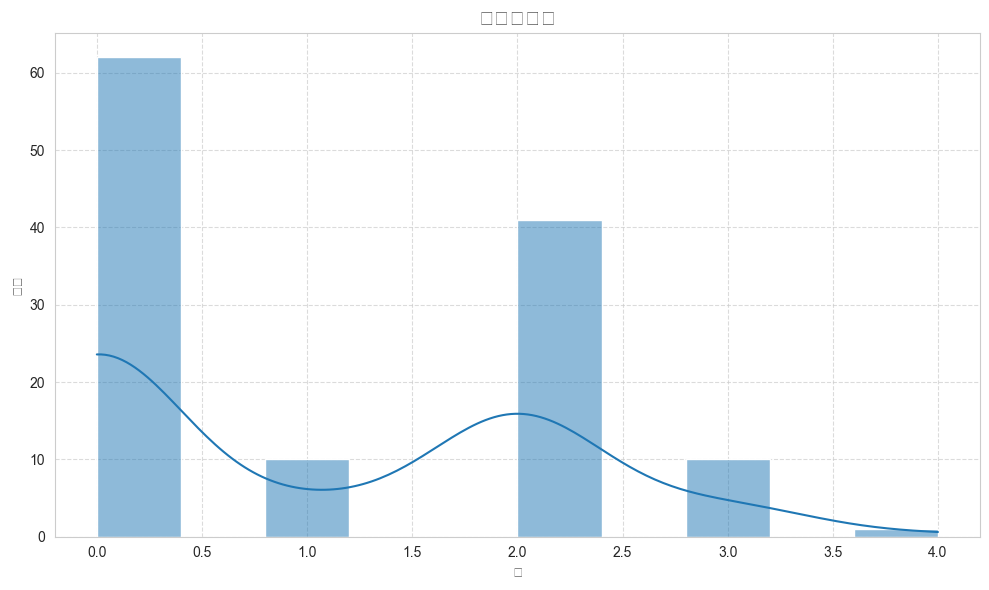

平均度: 1.02
中位数度: 0.50
最大度: 4
最小度: 0
度标准差: 1.11


In [27]:
graph.visualize_degree_distribution()

In [28]:
graph.visualize_graph_metrics()

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 1000 iterations')